# Ford Gobike Data Exploration

In this document I will explore **Ford gobike dataset**. <br>
This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

## Preliminary Wrangling

In [1]:
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv('fordgobike-tripdata.csv')
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df.shape

(183412, 16)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
# Checking for duplication
df.duplicated().sum()

0

In [6]:
# Checking if there is a null value
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
# Change the data type of certain columns
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])
df['start_station_id']= df['start_station_id'].astype('str')
df['end_station_id']= df['end_station_id'].astype('str')
df['bike_id']= df['bike_id'].astype('str')

In [8]:
# Create new columns
df['start_week_day']= df['start_time'].dt.strftime('%A')
df['start_hour']= df['start_time'].dt.strftime('%H')
df['member_age'] = df['start_time'].dt.strftime('%Y').astype('float') - df['member_birth_year']
df['duration_min'] = df['duration_sec']/60

In [9]:
df['start_hour']= df['start_hour'].astype('float')
df['start_week_day']= df['start_week_day'].astype('category')

In [10]:
# Reorder the days
days_ordered = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
df['start_week_day'] = pd.Categorical(df['start_week_day'], categories=days_ordered, ordered=True)

In [11]:
df

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_week_day,start_hour,member_age,duration_min
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,Thursday,17.0,35.0,869.750000
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,Thursday,18.0,NaN,708.683333
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,Thursday,12.0,47.0,1030.900000
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,Thursday,17.0,30.0,608.166667
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,Thursday,23.0,45.0,26.416667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.724,2019-02-01 00:12:50.034,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No,Friday,0.0,23.0,8.000000
183408,313,2019-02-01 00:05:34.744,2019-02-01 00:10:48.502,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No,Friday,0.0,35.0,5.216667
183409,141,2019-02-01 00:06:05.549,2019-02-01 00:08:27.220,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes,Friday,0.0,29.0,2.350000
183410,139,2019-02-01 00:05:34.360,2019-02-01 00:07:54.287,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No,Friday,0.0,31.0,2.316667


## Univariate Exploration

**What is the distribution of users according to their ages?**

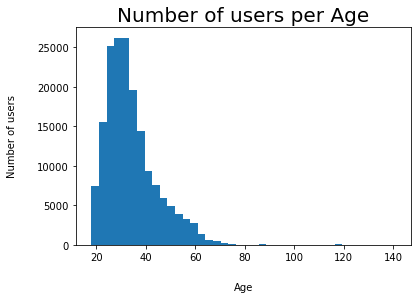

In [12]:
plt.hist(data = df, x = 'member_age', bins=40);
plt.title("Number of users per Age", fontsize=20);
plt.xlabel("Age", labelpad=20);
plt.ylabel("Number of users", labelpad=20);
plt.show();

> Most of the users fall between 20 and 40 years, and the closer to the age of 30, the more users

 ### 

**What is the distribution of users according to the start hour?**

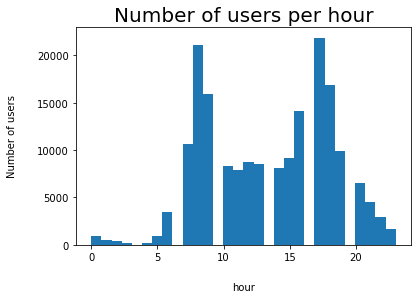

In [13]:
plt.hist(data = df, x = 'start_hour', bins=30)
plt.title("Number of users per hour", fontsize=20)
plt.xlabel("hour", labelpad=20)
plt.ylabel("Number of users", labelpad=20)
plt.show()

> We notice that in the night hours the number of users decreases while it increases in the daytime hours.

 ### 

**What is the distribution of users according to their genders?**

In [14]:
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [15]:
df['member_gender'].isna().sum()

8265

In [16]:
# Fill Null values in 'member_gender' column with 'other'
df['member_gender'].fillna("Other", inplace = True)
df['member_gender'].isna().sum()

0

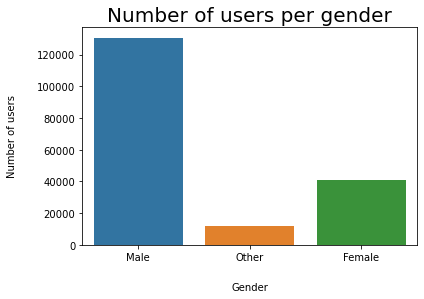

In [17]:
sns.countplot(x= "member_gender", data=df);
plt.title("Number of users per gender", fontsize=20);
plt.xlabel("Gender", labelpad=20);
plt.ylabel("Number of users", labelpad=20);
plt.show();

> From the graph, we notice that the number of male users is more than twice as high as females. We also note that there are quite a few whose gender has not been identified

 ### 

**What is the distribution of users according to week days?**

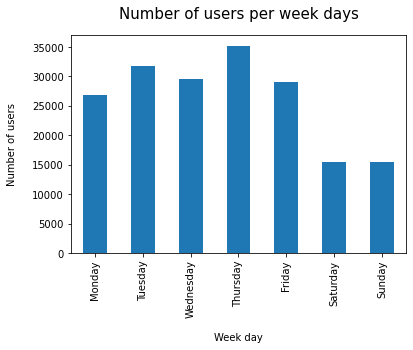

In [18]:
df.groupby('start_week_day').size().plot(kind='bar')
plt.title('Number of users per week days',y=1.05, fontsize=15)
plt.xlabel('Week day', labelpad=15)
plt.ylabel('Number of users', labelpad=15)
plt.show()

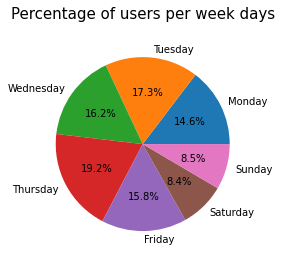

In [25]:
df.groupby('start_week_day').size().plot(kind='pie', autopct='%1.1f%%');
plt.title('Percentage of users per week days',y=1.05, fontsize=15);
plt.ylabel('');
plt.show();

> Thursday has the highest number of users, while Saturday has the lowest

## Bivariate Exploration

**What is the number of users per week days according to their types?**

In [20]:
ct_counts = df.groupby(['start_week_day', 'user_type']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index = 'start_week_day', columns = 'user_type', values = 'count')
ct_counts

user_type,Customer,Subscriber
start_week_day,,
Monday,2741,24111
Tuesday,2606,29207
Wednesday,2466,27175
Thursday,3390,31807
Friday,3030,25951
Saturday,2739,12666
Sunday,2896,12627


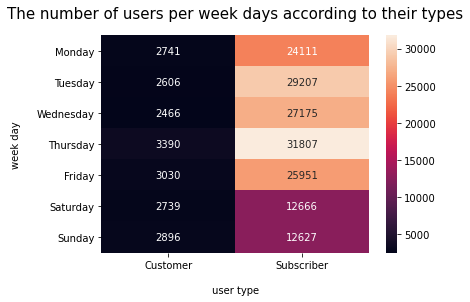

In [21]:
sns.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('The number of users per week days according to their types', y=1.05, fontsize=15);
plt.xlabel('user type', labelpad=15);
plt.ylabel('week day', labelpad=15);

Subscribers are the largest number, and both user types increase in number on Thursday.

 ### 

**What is the average trip duration per user gender?**

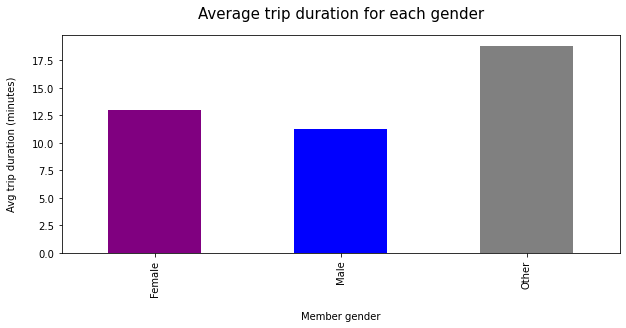

In [22]:
df.groupby('member_gender')['duration_min'].mean().plot(kind='bar', color=['purple','blue', 'gray'], figsize=(10,4));
plt.title('Average trip duration for each gender',y=1.05, fontsize=15);
plt.xlabel('Member gender', labelpad=15);
plt.ylabel('Avg trip duration (minutes)', labelpad=15);

> Regardless of the "other" type, female are the ones who take the longest trips

### Multivariate Exploration

**What is the average trip duration for each user type in week days?**

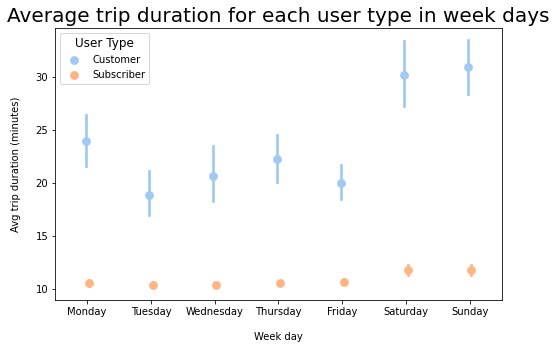

In [23]:
fig, ax = plt.subplots(figsize=(8, 5));
sns.pointplot(data=df, x='start_week_day', y='duration_min', hue='user_type', dodge=True, linestyles= 'none', palette="pastel", ax=ax);
plt.title("Average trip duration for each user type in week days", fontsize=20);
plt.xlabel('Week day', labelpad=15);
plt.ylabel('Avg trip duration (minutes)', labelpad=15);
leg = ax.legend();
leg.set_title('User Type',prop={'size':12});

From the graph, we can notice that the weekend (Saturday and Sunday) have the longest average trip duration in both user types. and also the non-subscriber users have the longest trip.

### 

**What is distribution of users over the hours of the day according to their genders and types ?**

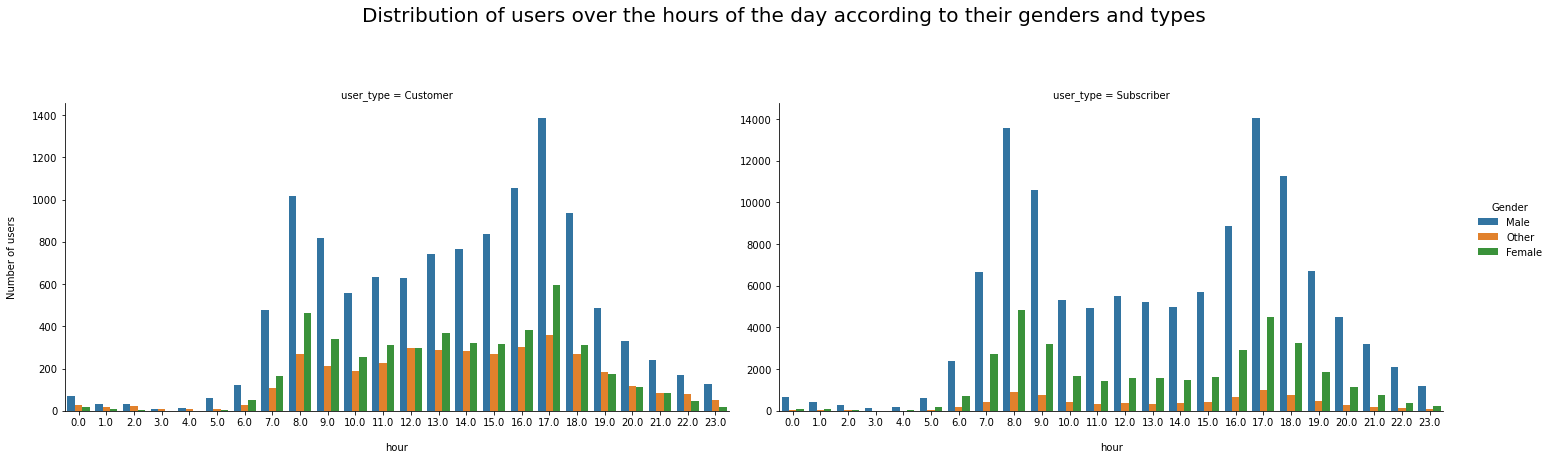

In [24]:
ax = sns.catplot(data=df, x='start_hour', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=2);
ax.set_axis_labels("hour", "Number of users" , labelpad=15);
ax._legend.set_title('Gender');
ax.fig.suptitle('Distribution of users over the hours of the day according to their genders and types', y=1.2, fontsize=20);

Regardless of the types, the largest number of users is at 8, 16 and 17

In [30]:
!jupyter nbconvert Communicate-Data-Findings-part2.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Communicate-Data-Findings-part2.ipynb to slides
[NbConvertApp] Writing 737113 bytes to Communicate-Data-Findings-part2.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\ros45\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\ros45\anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\ros45\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\ros45\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\ros45\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 524, in convert_notebooks
    self.convert_single_notebook(n